In [1]:
# Add the root path of the pyqula library
import os ; import sys
sys.path.append(os.environ["PYQULAROOT"])

# some default parameters in matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 20
plt.rcParams['image.cmap'] = 'coolwarm'

import numpy as np

# Superconductivity
In this session we will address several different examples involving supercondcutivity

## s-wave superconductivity driven by attractive interactions
First, we will show how a superconducting state appears due to attractive interactions

([], [])

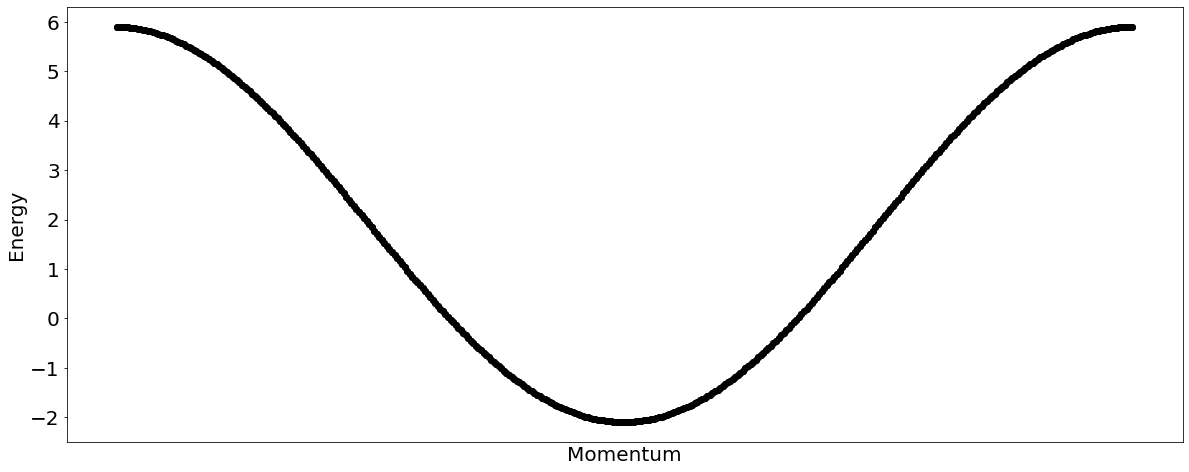

In [2]:
from pyqula import geometry
g = geometry.square_lattice() # generate a square lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.set_filling(0.2,nk=20) # set filling

# first, let us see how the band structure looks like
(k,e) = h.get_bands() # compute band structure

plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

(-1.0, 1.0)

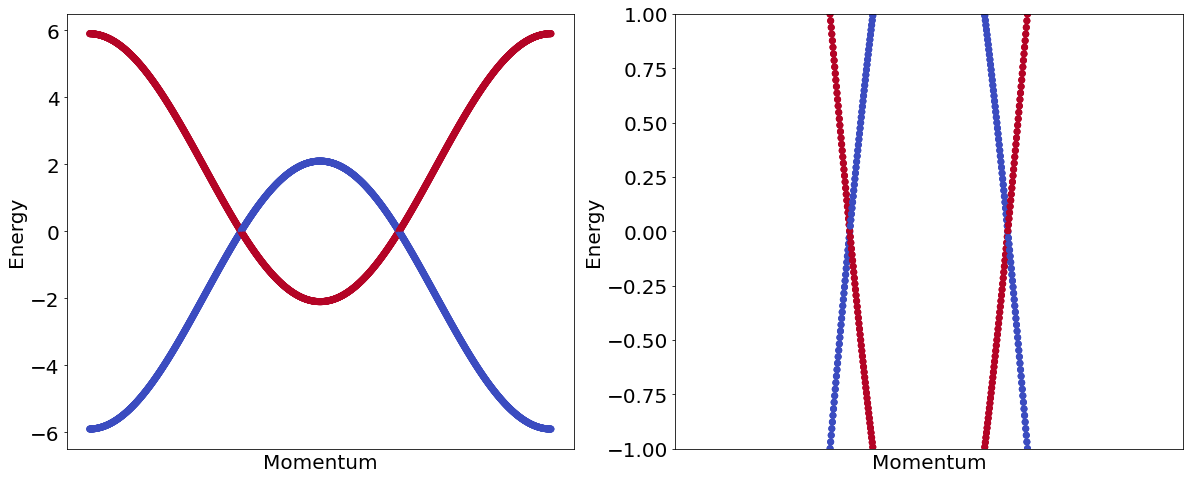

In [3]:
# as a warm up, let us look at how the bands look like if we added a Nambu spinor
# first, let us see how the band structure looks like
h.setup_nambu_spinor() # setup the nambu spinor
(k,e,c) = h.get_bands(operator="electron",nk=800) # compute band structure, returning the electron-hole flavor

# plot the bands in a wide and narrow range
plt.subplot(1,2,1)
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot
plt.subplot(1,2,2)
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ;plt.ylim([-1,1]) # plot

(-1.0, 1.0)

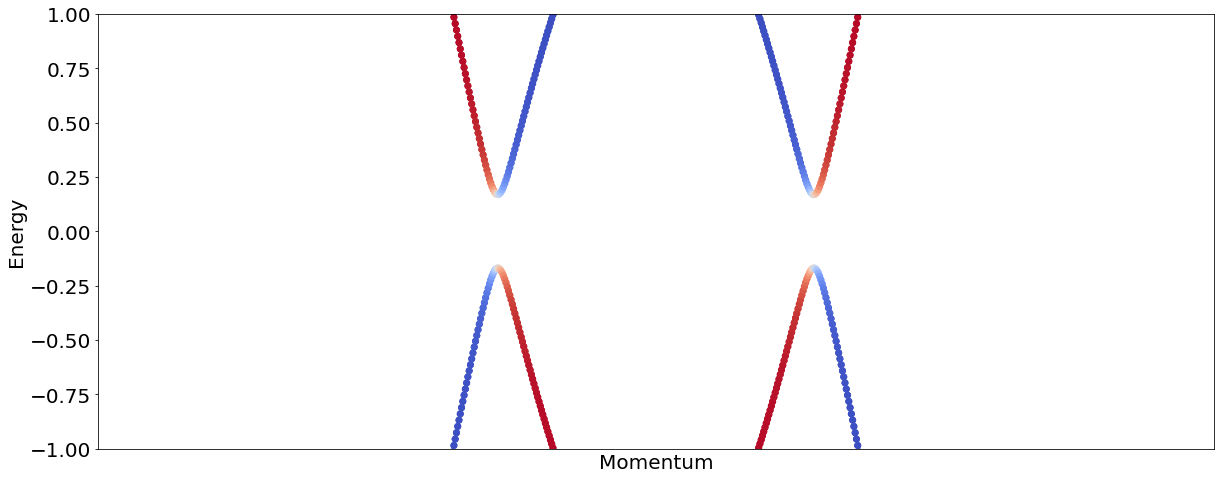

In [4]:
# now, let us include attractive interactions at the mean-field level
h.setup_nambu_spinor() # setup the nambu spinor
hscf = h.get_mean_field_hamiltonian(U=-2.0,filling=0.2,nk=10,mix=0.9,mf="swave")

# first, let us see how the band structure looks like
(k,e,c) = hscf.get_bands(operator="electron",nk=800) # compute band structure

plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1,1]) # plot

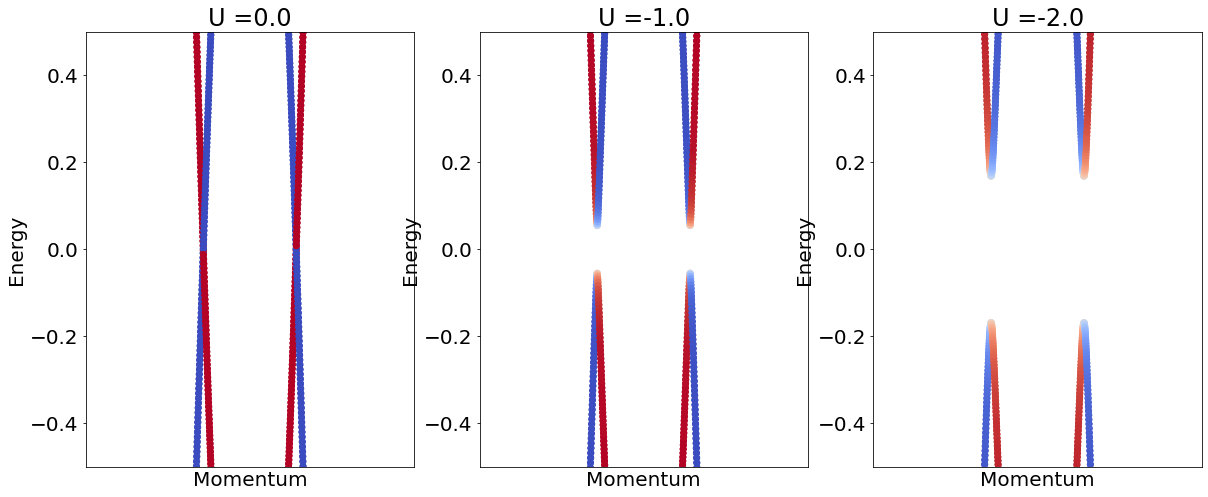

In [5]:
# We now compare the band structure for different interaction strength

Us = [0.0,-1.0,-2.0]
iu = 0
for U in Us: # loop over interaction strength
    hscf = h.get_mean_field_hamiltonian(U=U,filling=0.2,nk=10,mix=0.9,mf="swave")
    # first, let us see how the band structure looks like
    (k,e,c) = hscf.get_bands(operator="electron",nk=2000) # compute band structure
    plt.subplot(1,len(Us),iu+1) ; iu += 1
    plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-.5,.5]) ; plt.title("U ="+str(U)) # plot

### Exercise
- Perform the selfconsistent calculation above including an external Zeeman field. Does the superconducting gap become bigger or smaller? This effect is known as paramagnetic depairing.

## Superconductivity in the presence of spin-orbit coupling
In the following we will show how a superconducting state is compatible with spin-orbit coupling. As a reference, we will use the Hamiltonian of NbSe2 that includes long range hopping.

### Ising spin-orbit coupling
Here we first start looking at the impact of Ising spin-orbit coupling, and its interplay with superconductivity. In the presence of s-wave superconductivity, spin-orbit coupling is not detrimental to the superconducting state

([], [])

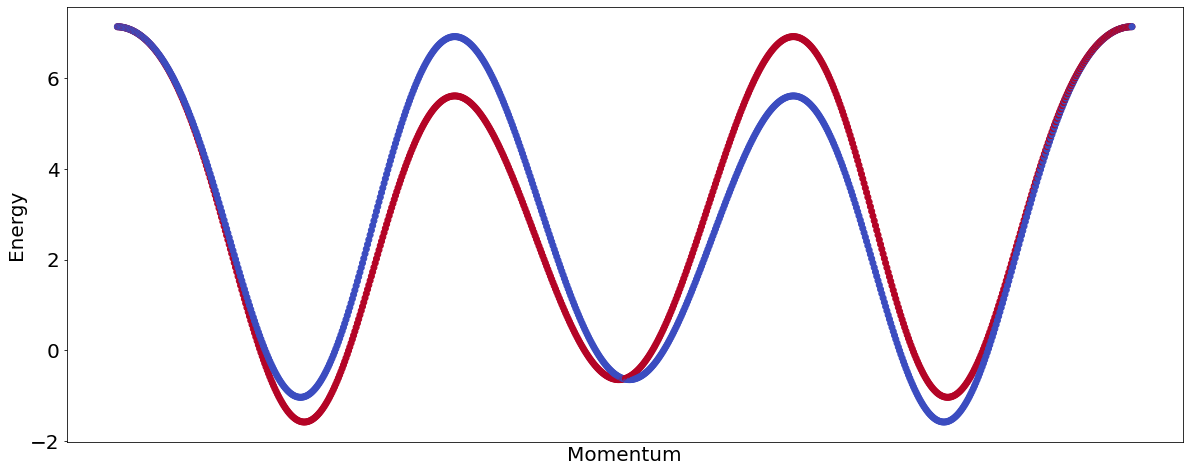

In [6]:
# first compute the bands without superconductivity
from pyqula import specialhamiltonian # special Hamiltonians library
h = specialhamiltonian.NbSe2(soc=0.5) # NbSe2 Hamiltonian
(k,e,c) = h.get_bands(operator="sz",nk=800) # compute bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

(-2.0, 2.0)

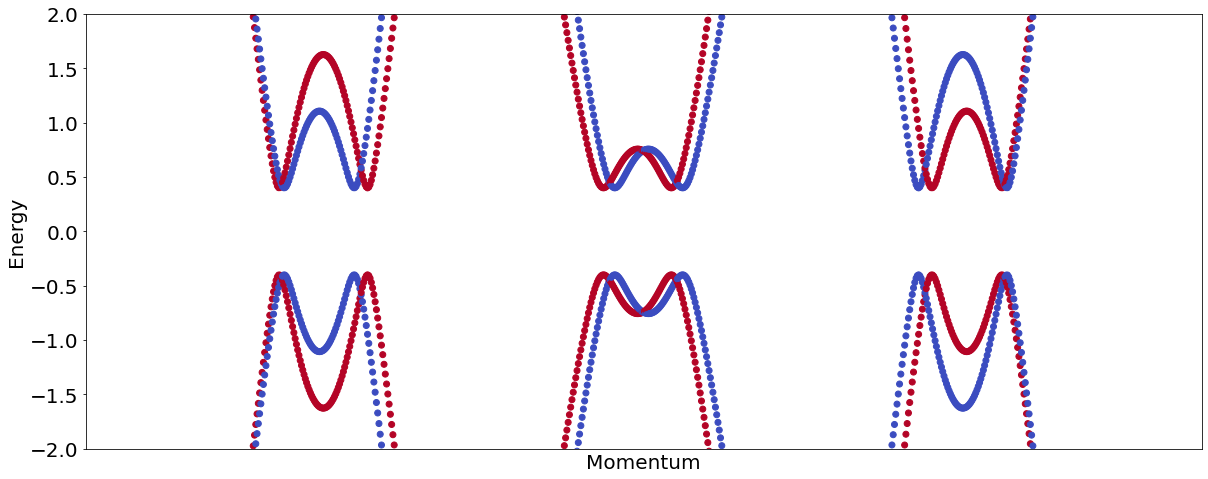

In [7]:
# now add superconductivity
h.add_swave(0.4)
(k,e,c) = h.get_bands(operator="sz",nk=800) # compute bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-2,2]) # plot

## Rashba spin-orbit coupling
Here we look at the impact of Rashba spin-orbit coupling, and its interplay with s-wave superconductivity. Due to Kramer's theorem, a finite Rashba spin-orbit coupling is not detrimental for an s-wave superconducting state

([], [])

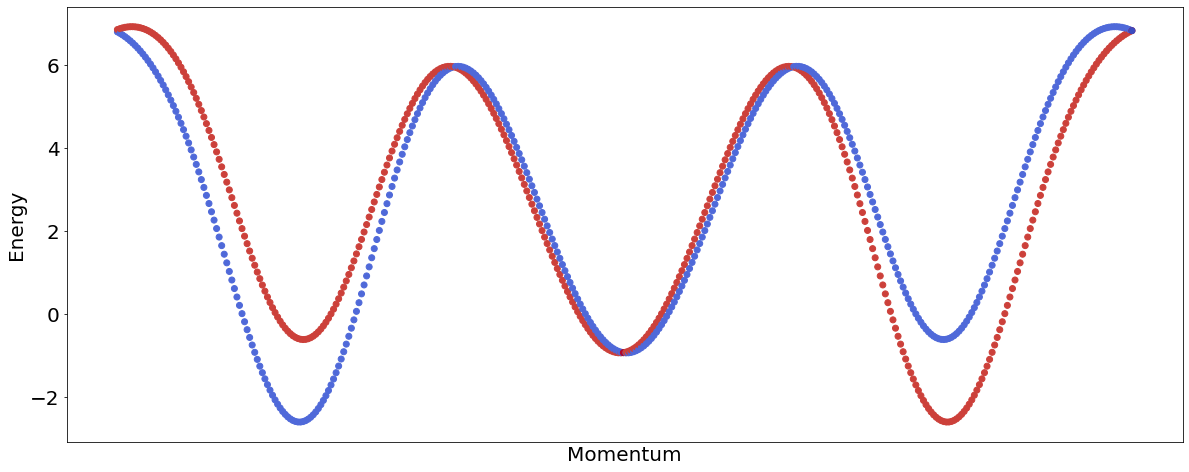

In [8]:
# first compute the bands without superconductivity
from pyqula import specialhamiltonian # special Hamiltonians library
h = specialhamiltonian.NbSe2() # NbSe2 Hamiltonian
h.add_rashba(0.3) # add Rashba SOC
(k,e,c) = h.get_bands(operator="sx") # compute bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

(-2.0, 2.0)

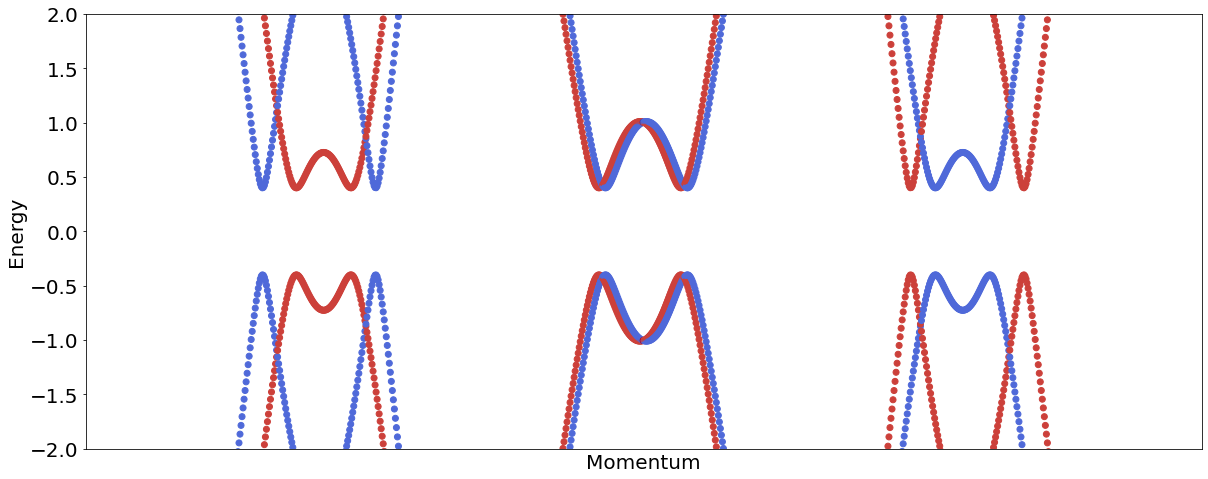

In [9]:
# now add superconductivity
h.add_swave(0.4)
(k,e,c) = h.get_bands(operator="sx",nk=1000) # compute bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-2,2]) # plot

### Exercise
- Compute the electronic structure with s-wave superconductivity in the presence of both Rashba and Ising spin-orbit coupling, and show that the superconducting gap remains unaffected in the presence of SOC.

# Artificial topological superconductivity
Here, as warm up exercise, we will create an artificial topological superconductor by combining s-wave superconductivity, exchange field and Rashba spin-orbit coupling. For the sake of concreteness we will use a triangular lattice with first neighbor hopping.

([], [])

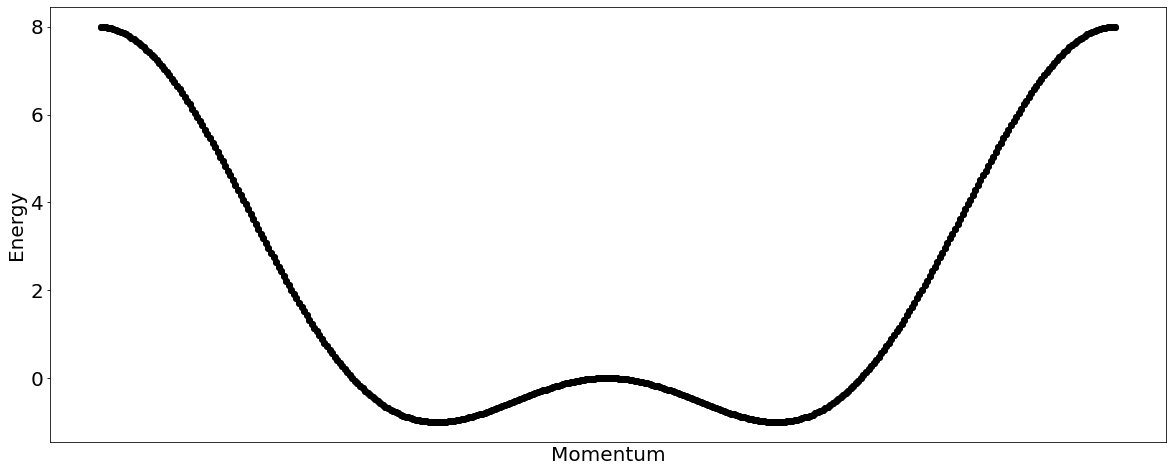

In [10]:
# Let us first look at the band structure without additional terms
g = geometry.triangular_lattice() # get the geometry
h = g.get_hamiltonian() # get the Hamiltonian
h.add_onsite(2.0) # shift chemical potential
(k,e) = h.get_bands() # compute the bands
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

([], [])

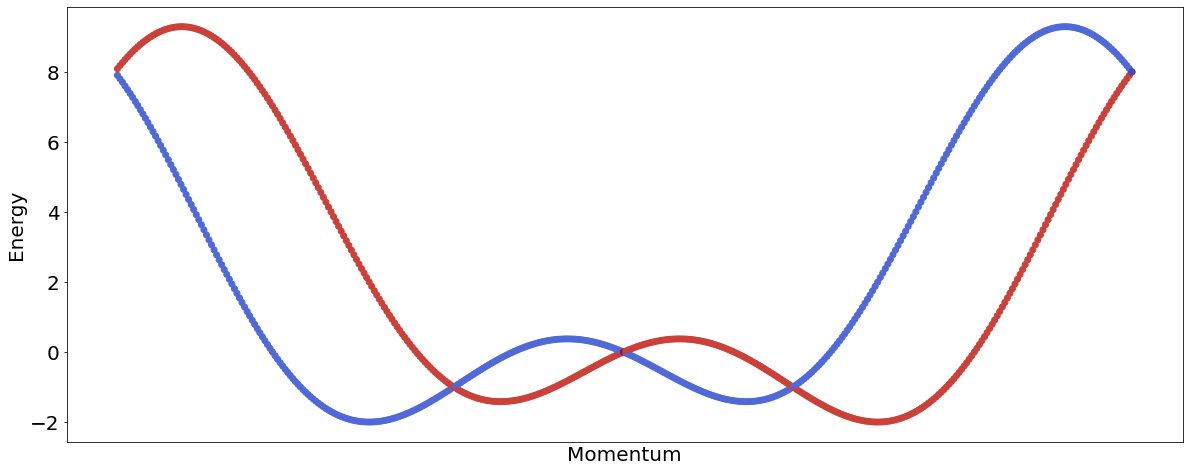

In [11]:
# Now we add Rashba spin-orbit coupling, to create a spin-momentum locking in the electronic structure
h.add_rashba(1.0) # Rashba spin-orbit coupling
(k,e,c) = h.get_bands(operator="sx") # compute the bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

(-2.0, 2.0)

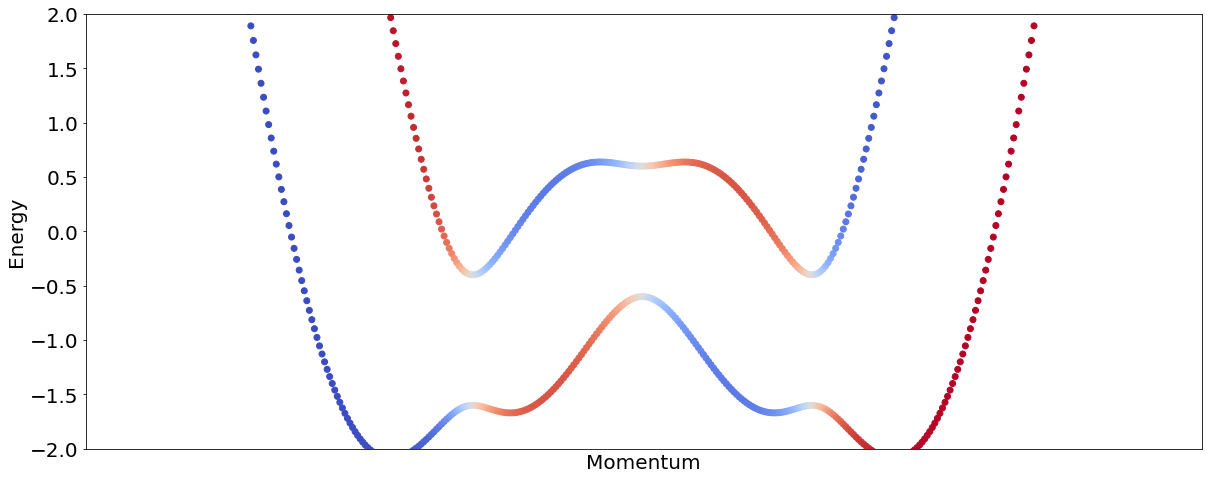

In [12]:
# Now we add a Zeeman field, to open up a gap in the points where different spins cross
h.add_zeeman([0.,0.,0.6]) # Zeeman field
(k,e,c) = h.get_bands(operator="sx") # compute the bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-2.,2.]) # plot

(-2.0, 2.0)

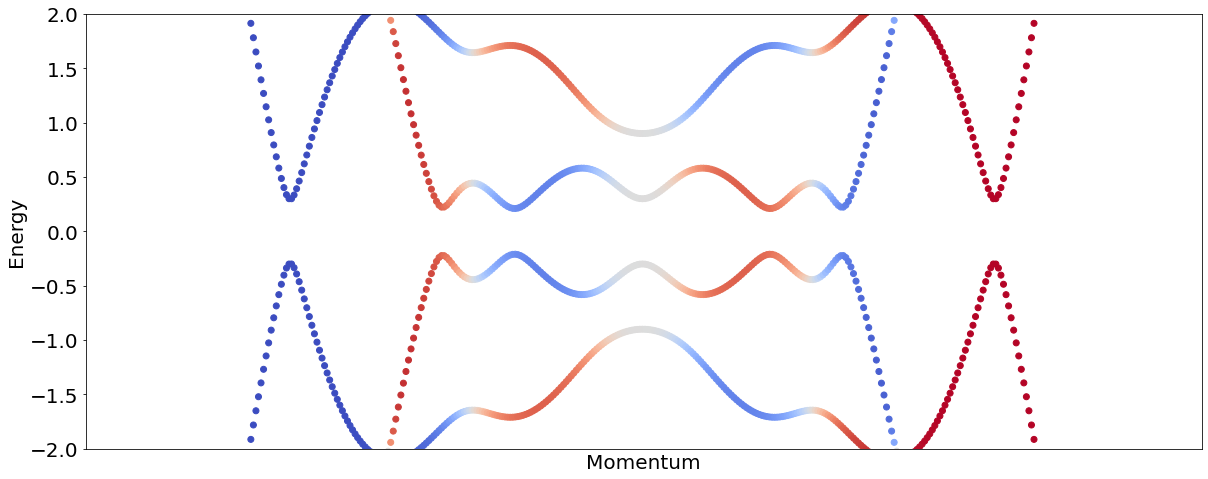

In [13]:
# finally we add a superconducting order
h.add_swave(.3) # add superconductivity
(k,e,c) = h.get_bands(operator="sx") # compute the bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-2.,2.]) # plot

In [14]:
# Now let us compute the Chern number
c = h.get_chern() # compute Chern number
print("The Chern number is",int(round(c)))

The Chern number is -3


(-1.099, 1.079, -1.099, 1.079)

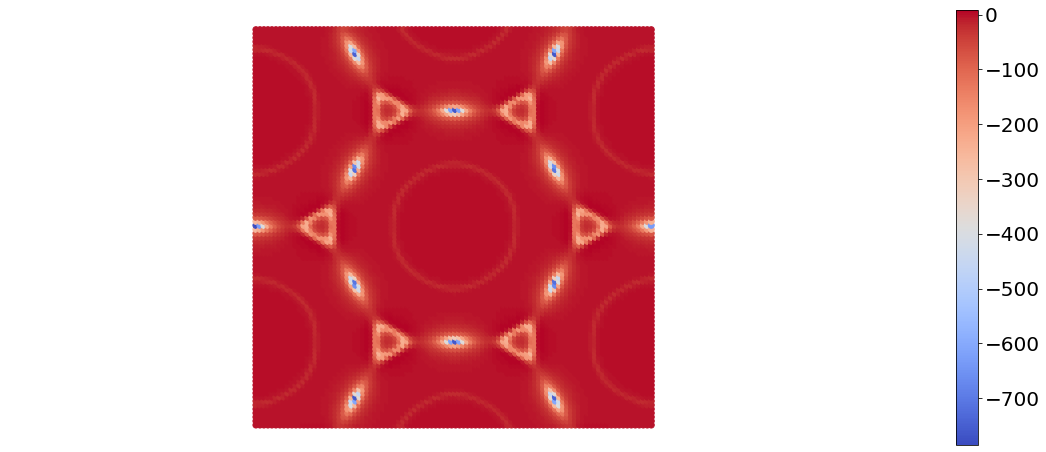

In [15]:
# now let us compute the Berry curvature in 2D
(kx,ky,omega) = h.get_berry_curvature() # compute Berry curvature
plt.scatter(kx,ky,c=omega)
plt.axis("equal") ; plt.colorbar() ; plt.axis("off") 

## Edge states of an artificial topological superconductor
Here, taking as starting point the Hamiltonian of a topological superconductor above, we will show how topological edge states appear in finite systems

(-1.0, 1.0)

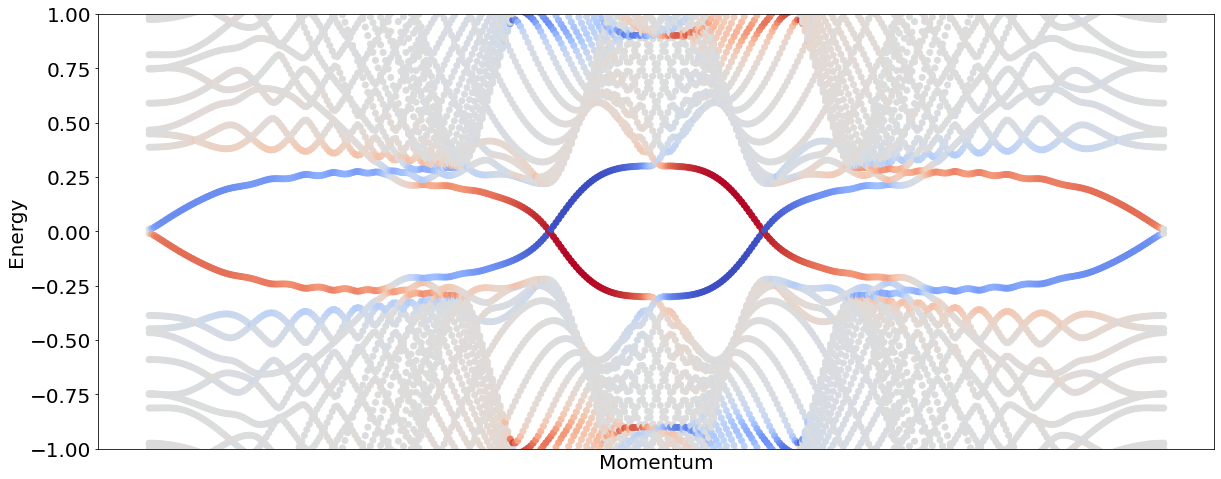

In [16]:
from pyqula import ribbon
hr = ribbon.hamiltonian_ribbon(h,n=30) # create a ribbon from a bulk Hamiltonian
(k,e,c) = hr.get_bands(operator="yposition") # plot the bands highlighting the position
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.]) # plot

(-40.425, 40.42499999999998, -13.813105190361796, 13.813105190361796)

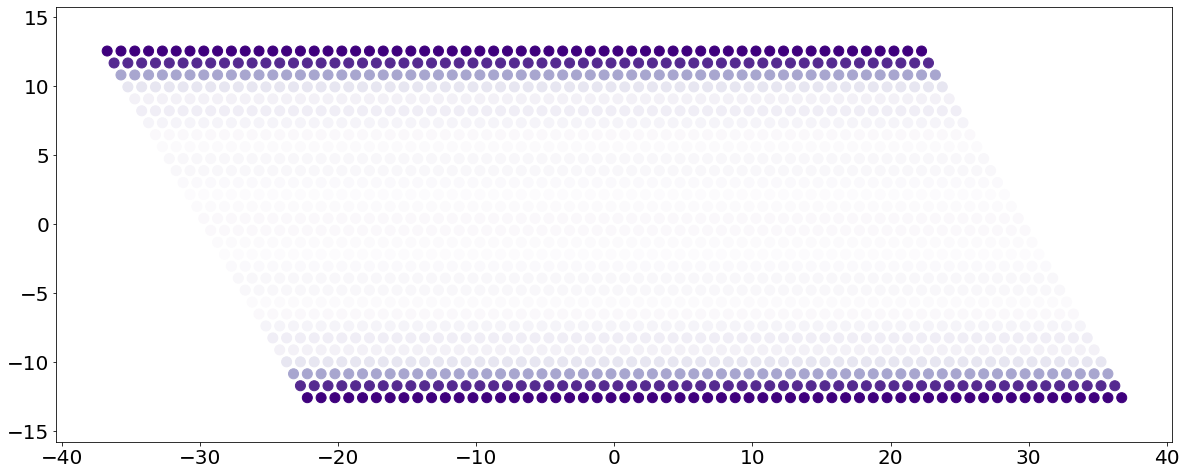

In [17]:
(x,y,d) = hr.get_ldos(energy=0.0,nrep=60,delta=1e-2,nk=50) # compute the local density of states
plt.scatter(x,y,c=d,s=100,cmap="Purples") ; plt.axis("equal") # plot

### Exercise
- The localization of the edge modes depends on the topological gap. Show that for parameters yielding a small topological gap, the edge states are more delocalized
- Show that if the ribbon is not wide enough, the edge states hybridize and lead to a gap opening

## Topological phase transition with the exchange field
Above we saw that superconductivity can coexist with spin-orbit coupling. Since the superconductor at zero exchange field is trivial, a topological phase transition must occur as the exchange field is turned on. Here we will show how such a phase transition takes place

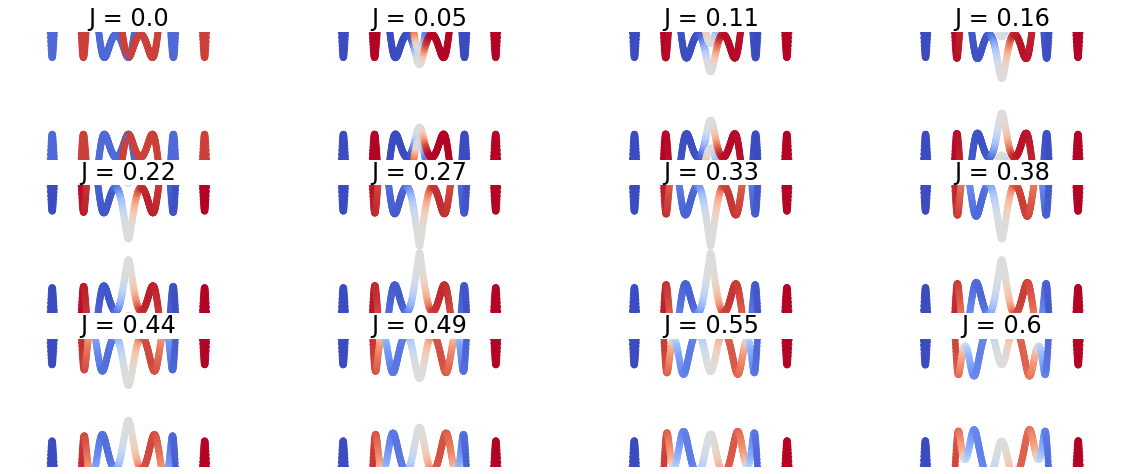

In [18]:
# plot the bands for different exchance couplings

Js = np.linspace(0.,0.6,12) # exchange couplings
ij = 0 # counter
for J in Js: # loop over exchange couplings
    g = geometry.triangular_lattice() # get the geometry
    h = g.get_hamiltonian() # get the Hamiltonian
    h.add_onsite(2.0) # shift chemical potential
    h.add_rashba(1.0) # add Rashba SOC
    h.add_zeeman([0.,0.,J]) # add exchange field
    h.add_swave(0.3) # add swave SC
    (k,e,c) = h.get_bands(nk=1000,operator="sx") # compute the bands
    plt.subplot(len(Js)//4,4,ij+1) ; ij +=1 
    plt.scatter(k,e,c=c) ; plt.axis("off") ; plt.ylim([-0.5,0.5]) ; plt.title("J = "+str(round(J,2))) # plot



### Exercise
- See if you can create such a topological phase transition with an in-plane exchange field. 
- Why is an out of plane exchange field required? 
- Discuss with your colleagues if there is some symmetry reason why an in-plane exchange field does not work

## Advanced exercises
- In the artificial topological superconductor above, the chemical potential was originally crossing the M points. Compute the electronic structure in the case the chemical potential crosses the Gamma or K points, and show what is the topological invariant you will obtain in that case
- In each of those cases, compute the Chern number and the topological invariant and show that you have as many edge states as those given by the Chern number
- Topological superconductivity can also appear in other lattices. Try to engineer a topological superconductor in a square, honeycomb and Kagome lattice, and rationalize where you should put the chemical potential